# Standard segmentation/measurement
Typical steps are import, project (sum or max or combo), backsub.
Then blur, thresfrac (max, percentile, avg), filter objects (area/circ), dilate (border)
Then measure subtracted and shapes and output table.

In [1]:
# This notebook follows a standard segmentation workflow
import numpy as np
import tifffile
import napari
import pandas as pd
import matplotlib.pyplot as plt
import ipfunctions as ipf
import ipwidgets as ipw
#import scipy.ndimage as ndi
#from magicgui import magicgui
#from napari.types import LabelsData,ImageData
#import enum

napari.manifest -> 'napari-molecule-reader' could not be imported: Could not find file 'napari.yml' in module 'napari_molecule_reader'


In [2]:
#first load the images, here we have individually saved channels
fnames=['003003-1-001001001.tif','003003-1-001001002.tif','003003-1-001001003.tif']
img=np.array([tifffile.imread(fnames[i]) for i in range(len(fnames))])

In [3]:
viewer=napari.view_image(img,channel_axis=0)

/Users/jru/opt/miniconda3/envs/naparienv/lib/python3.8/site-packages/napari_tools_menu/__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


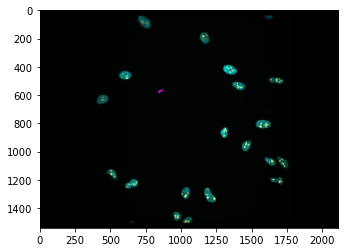

In [4]:
snap=viewer.screenshot()
plt.imshow(snap)

In [5]:
minx,miny,backavg,_,_=ipf.findBackground(img,3,40,200,30)
print('background pos:'+str([minx,miny]))
print('background measurements:'+str(backavg))

sm chan mins: [95, 94, 112]
flat min index:153000
background pos:[200, 425]
background measurements:[143.49627791563276, 130.68876285005317, 149.26409074796172]


In [6]:
viewer.add_points([[miny,minx]],size=80,name='Background_Spot')

/Users/jru/opt/miniconda3/envs/naparienv/lib/python3.8/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


<Points layer 'Background_Spot' at 0x7fafeeb11f70>

In [7]:
#getMeasurement(viewer.layers[1].data,viewer.layers[-1].data,[425,200],'Avg')
viewer=ipw.makeSegWidget(viewer.layers[0],viewer.layers[-1],viewer)

back coords:[425 200]
measurement command:
measdf=ipwidgets.getMeasurement(measimg,nuclabels,[425, 200],"Avg")
          stat    area
0  2528.747968  2293.0
1  4455.976986  3119.0
2  3449.744590  2464.0
3  2229.251223  1813.0
4  3364.379831  2273.0
